In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

**You can enable "Table of Contents" for better navigation in the code**

# Data Import

In [4]:
hrdata_orig = pd.read_csv("employee.csv",delimiter=',')

hrdata=pd.get_dummies(hrdata_orig, prefix=None, drop_first=True)
hrdata.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufactur

In [5]:
hrdata_orig

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Replacing True-False values with 1,0

In [7]:
hrdata

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,1,2,3,61,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,1,4,4,92,2,1,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,True,False,False,False,False,False,False,True,False,False
1466,39,613,6,1,1,2062,4,42,2,3,...,False,False,False,False,False,False,False,True,False,False
1467,27,155,4,3,1,2064,2,87,4,2,...,False,False,True,False,False,False,False,True,False,True
1468,49,1023,2,3,1,2065,4,63,2,2,...,False,False,False,False,False,True,False,True,False,False


In [8]:
hrdata= hrdata.replace({True:1, False:0})
hrdata

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,0,0,0,1,0,1,0,0


# 1) EDA

Goal
- Identify the root causes for employees’ unhappiness
- Suggest solutions based on these root causes

In [11]:
# Check for NaN values
hrdata.isnull().sum()

Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeCount                        0
EmployeeNumber                       0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager     

As we can see we don't have null values

Now we will remove some features which are redundant and they do not contribute to the outcome

In [14]:
hrdata.drop(columns=["EmployeeCount", "EmployeeNumber", "StandardHours"],inplace=True)

In [15]:
hrdata

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,4,42,2,3,1,9991,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,2,87,4,2,2,6142,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,0,0,0,0,1,0,1,0,0


In [16]:
# Check for demographics
hrdata["Age"].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

The average age is 36 years old

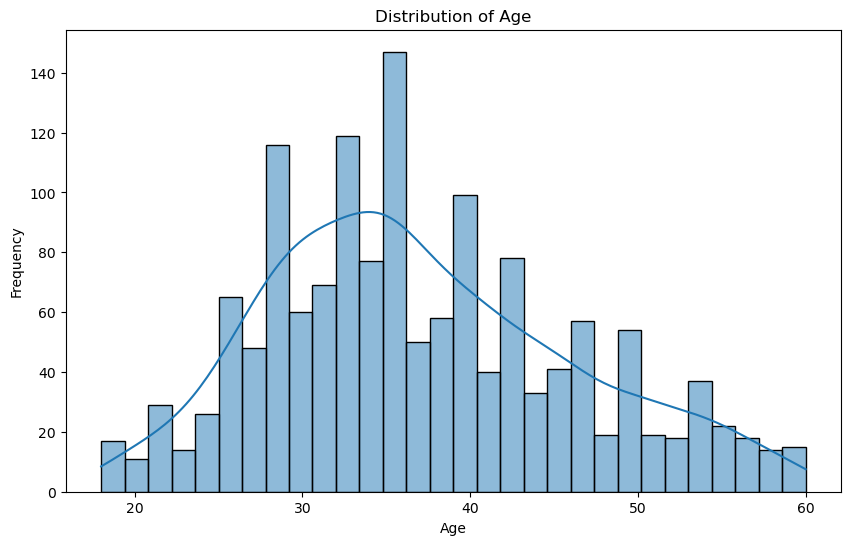

In [18]:
# Plotting the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(hrdata['Age'], bins=30, kde=True, palette="coolwarm")
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Numerical summary by age group for salary
age_salary_group = hrdata.groupby(pd.cut(hrdata['Age'], bins=range(20, 70, 10)))['MonthlyIncome'].describe()
print(age_salary_group)

          count          mean          std     min      25%      50%      75%  \
Age                                                                             
(20, 30]  358.0   4005.142458  2195.242798  1052.0  2409.25   3302.5   4785.0   
(30, 40]  619.0   5868.814216  3453.727483  1129.0  3296.00   5121.0   7111.5   
(40, 50]  322.0   9073.630435  5842.804469  2011.0  4437.25   6754.5  13965.5   
(50, 60]  143.0  10574.881119  5918.049639  2066.0  5165.50  10552.0  16161.5   

              max  
Age                
(20, 30]  16124.0  
(30, 40]  19833.0  
(40, 50]  19973.0  
(50, 60]  19999.0  


In [20]:
# Average Monthly Income
mincome= np.average(hrdata["MonthlyIncome"])
mincome

6502.931292517007

In [21]:
# Monthly Income by Gender
# If 'Gender_Male' is 1 for males and 0 for females:
gender_labels = {1: 'Male', 0: 'Female'}

# Replace the binary with text for clarity in the output
hrdata['Gender_Male'].map(gender_labels)

gender_salary_group = hrdata.groupby('Gender_Male')['MonthlyIncome'].describe()

print(gender_salary_group)

             count         mean          std     min     25%     50%      75%  \
Gender_Male                                                                     
0            588.0  6686.566327  4695.608507  1129.0  3037.0  5081.5  8711.75   
1            882.0  6380.507937  4714.856577  1009.0  2819.5  4837.5  8113.75   

                 max  
Gender_Male           
0            19973.0  
1            19999.0  


In [22]:
# Check for gender distribution
count_male= (hrdata["Gender_Male"]==1).sum()

count_female= (hrdata["Gender_Male"]==0).sum()
print(count_male,count_female)

882 588


In [23]:
male_percentage= count_male/len(hrdata)

female_percentage= count_female/len(hrdata)

print(male_percentage,female_percentage)

0.6 0.4


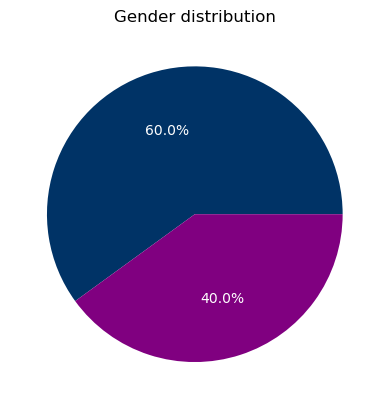

In [24]:
labels = ["Men", "Women"]
proportions = [male_percentage, female_percentage] 
colors = ["#003366", "#800080"]

# Adding text properties for white color
textprops = {"color": "white"}

plt.pie(proportions, autopct='%1.1f%%', labels=labels, colors=colors, textprops=textprops)
plt.title("Gender distribution")
plt.show()

In [25]:
# Frequency of each education level
education_counts = hrdata['Education'].value_counts()
education_percentages = (education_counts / education_counts.sum()) * 100
print(education_percentages)

Education
3    38.911565
4    27.074830
2    19.183673
1    11.564626
5     3.265306
Name: count, dtype: float64


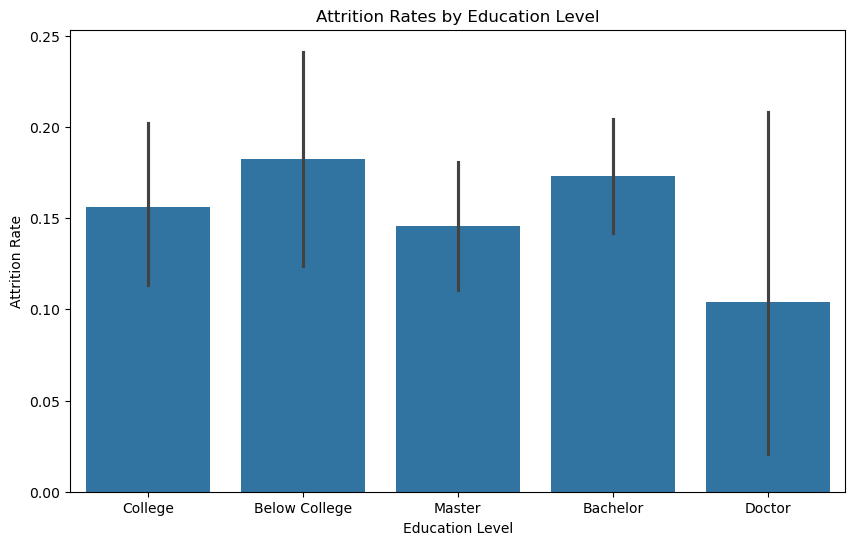

In [26]:
# Plotting attrition rates by education level
education_levels = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}

plt.figure(figsize=(10, 6))
sns.barplot(x=hrdata['Education'].map(education_levels), y='Attrition_Yes', data=hrdata)
plt.title('Attrition Rates by Education Level')
plt.ylabel('Attrition Rate')
plt.xlabel('Education Level')
plt.show()

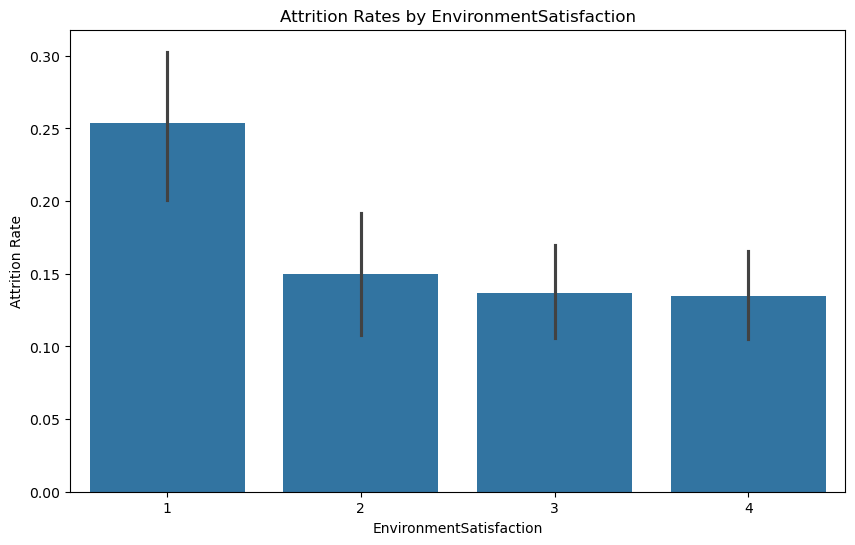

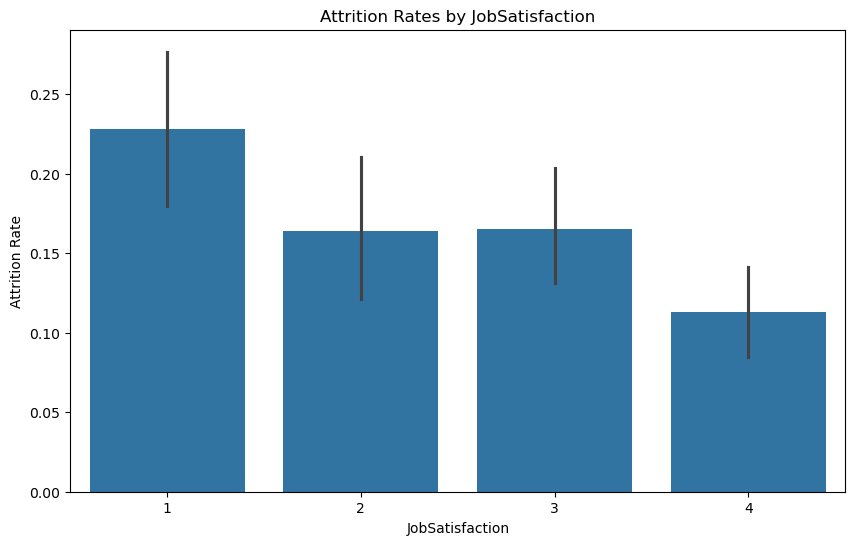

In [27]:
# Plotting attrition rates by environment satisfaction and job satisfaction
for column in ['EnvironmentSatisfaction', 'JobSatisfaction']:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y='Attrition_Yes', data=hrdata)
    plt.title(f'Attrition Rates by {column}')
    plt.ylabel('Attrition Rate')
    plt.xlabel(column)
    plt.show()

In [28]:
np.average(hrdata[hrdata["Attrition_Yes"] == 1]["MonthlyIncome"])

4787.0928270042195

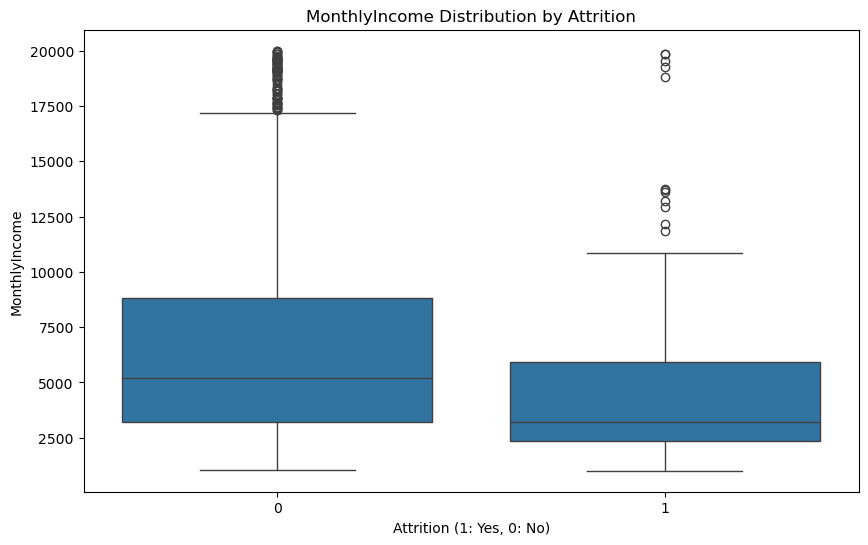

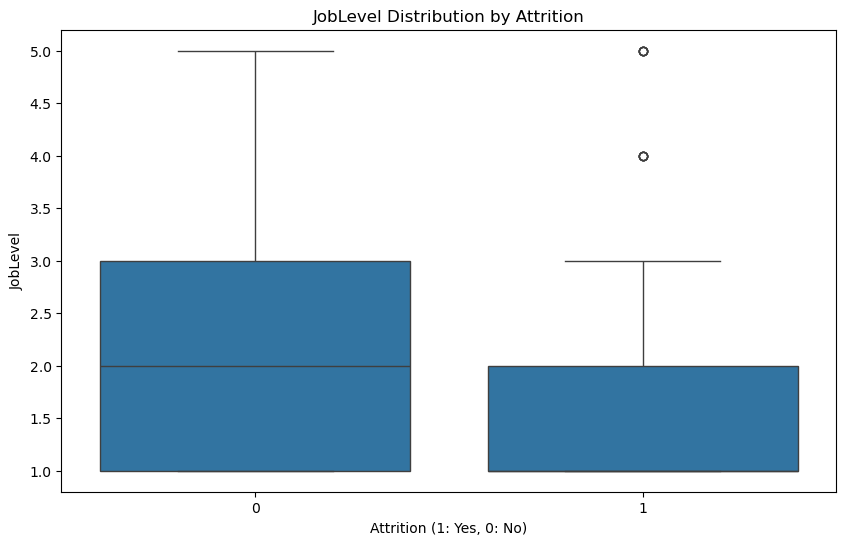

In [29]:
# Visualizing attrition across different levels of monthly income and job level
for column in ['MonthlyIncome', 'JobLevel']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Attrition_Yes', y=column, data=hrdata)
    plt.title(f'{column} Distribution by Attrition')
    plt.ylabel(column)
    plt.xlabel('Attrition (1: Yes, 0: No)')
    plt.show()

In [30]:
# Print summary statistics for numerical columns by attrition
grouped = hrdata.groupby('Attrition_Yes')
print(grouped[['MonthlyIncome', 'JobLevel']].describe().transpose())

Attrition_Yes                   0             1
MonthlyIncome count   1233.000000    237.000000
              mean    6832.739659   4787.092827
              std     4818.208001   3640.210367
              min     1051.000000   1009.000000
              25%     3211.000000   2373.000000
              50%     5204.000000   3202.000000
              75%     8834.000000   5916.000000
              max    19999.000000  19859.000000
JobLevel      count   1233.000000    237.000000
              mean       2.145985      1.637131
              std        1.117933      0.940594
              min        1.000000      1.000000
              25%        1.000000      1.000000
              50%        2.000000      1.000000
              75%        3.000000      2.000000
              max        5.000000      5.000000


In [31]:
# Attrition percentage
attrition_perc= (hrdata["Attrition_Yes"]==1).sum() / len(hrdata)
print(round(attrition_perc,2))

0.16


In [32]:
# Check for duplicate records
duplicates = hrdata.duplicated().sum()
duplicates

0

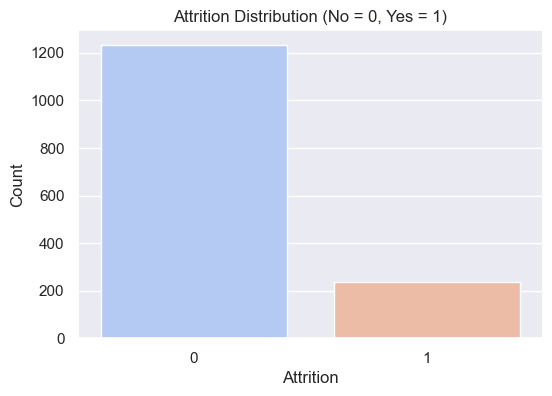

In [33]:
sns.set_theme(style="darkgrid")

# Attrition Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x= hrdata["Attrition_Yes"], palette="coolwarm")
plt.title("Attrition Distribution (No = 0, Yes = 1)")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

Approxiamtely 16% of the eployees of our client have abandoned their post

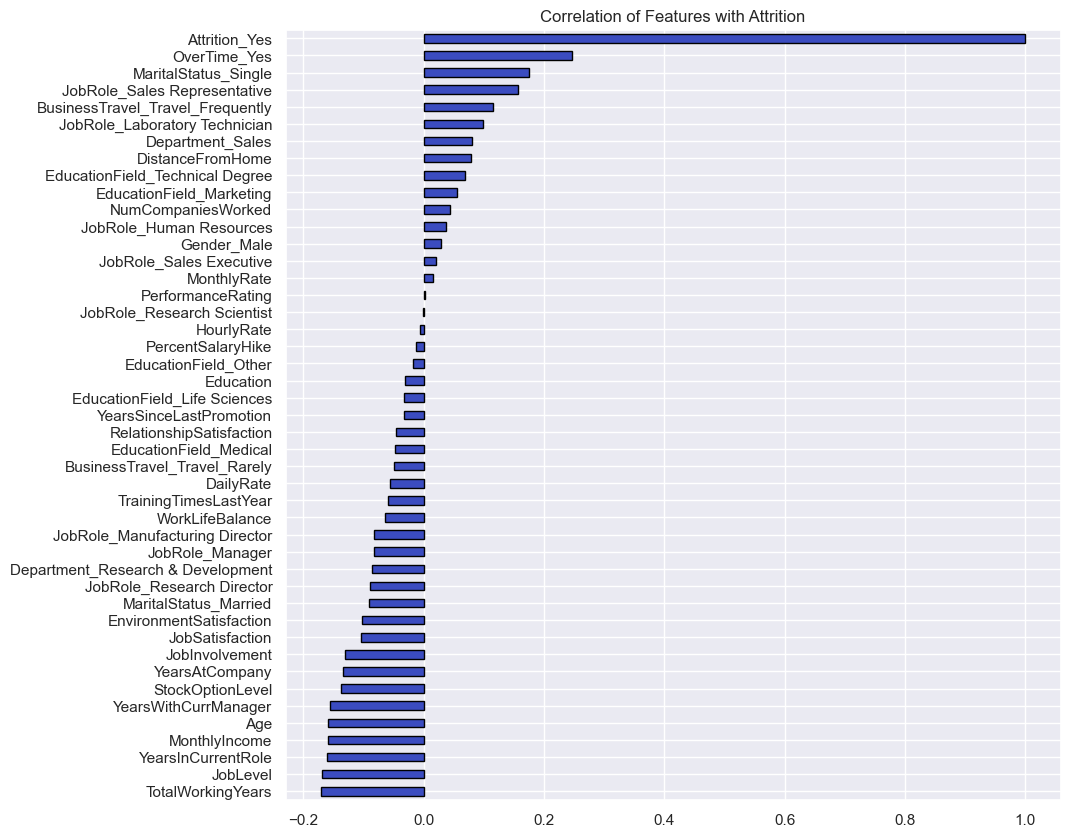

In [35]:
# Correlation of features with Attrition graph
plt.figure(figsize=(10, 10))
hrdata.corr()["Attrition_Yes"].sort_values().plot(kind="barh", cmap="coolwarm", edgecolor="black")
plt.title("Correlation of Features with Attrition")
plt.show()

- OverTime, MaritalStatus_Single and Job Role (Sales Representative) seem to positively affect attrition
- MonthlyIncome has a negative correlation with attrition which is logical
- Employees with with high JobSatisfaction seem to be less prone to attrition.

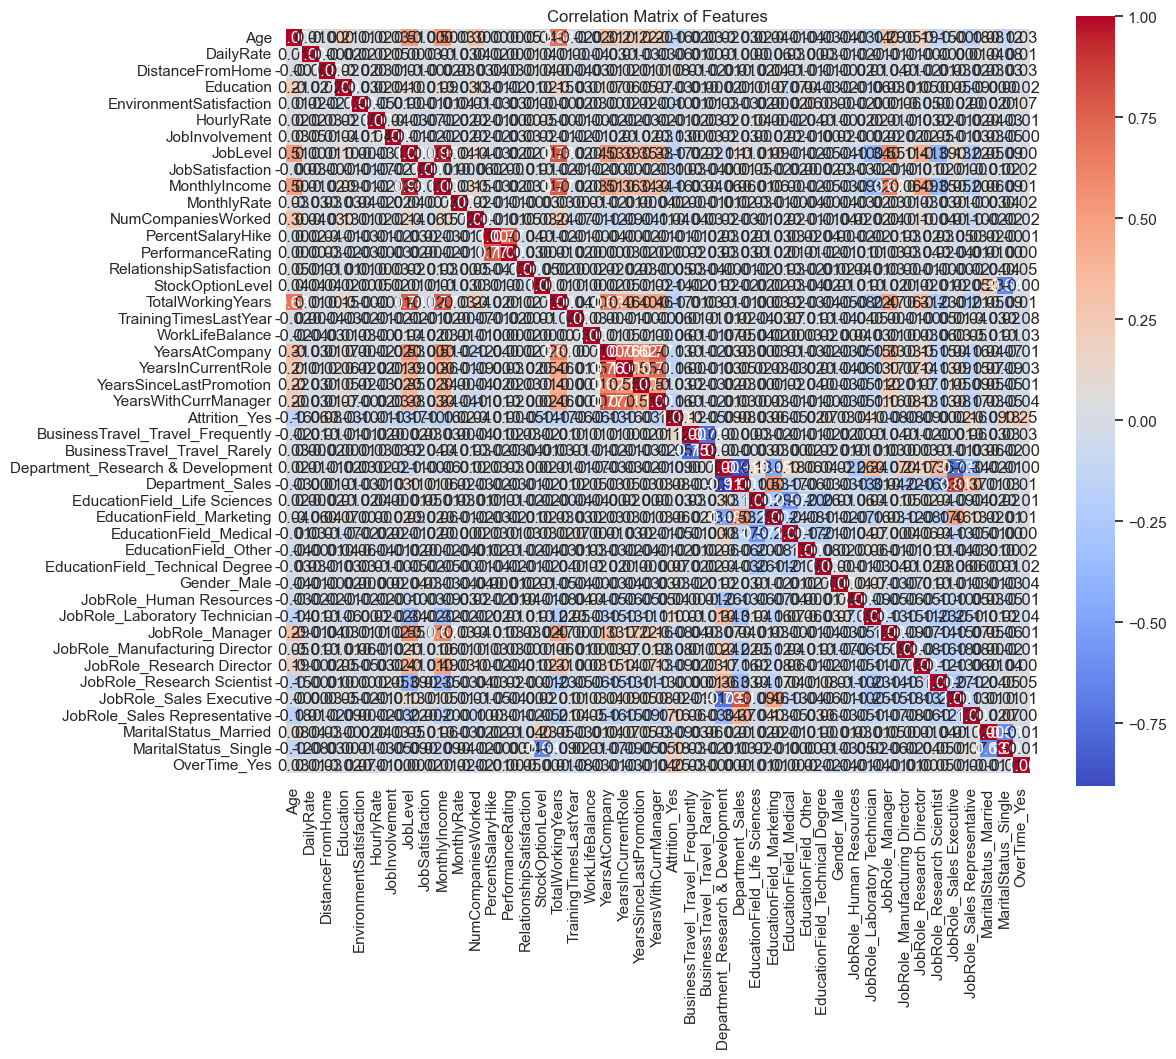

In [37]:
# Correlation Matrix
corr_matrix = hrdata.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Features")
plt.show()

In [38]:
# Check which variables have a high correlation
# Set a threshold for high correlation
threshold = 0.8

# List to store pairs of features that are highly correlated
high_corr_pairs = []

# Loop through the correlation matrix and collect pairs with correlation above the threshold
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Display the highly correlated pairs
print("Highly correlated pairs (|correlation| > {}):".format(threshold))
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")

Highly correlated pairs (|correlation| > 0.8):
JobLevel and MonthlyIncome: correlation = 0.95
Department_Research & Development and Department_Sales: correlation = -0.91
Department_Sales and JobRole_Sales Executive: correlation = 0.81


From the correlation matrix we found out that there are two pairs of high positive correlated variables (>0.8) and one highly negative correlated pair (>-0.8). After running the code multiple time I found out that by removing on of the variables from thai pairs with correlation 0.81 and -0.91 begatively affects PCA and clustering. Thus, I decided to proceed by removing only "Monthly Income".

In [40]:
hrdata.drop(columns=["MonthlyIncome"], inplace=True)

# 2) PCA and K-means

## PCA

To be sure that the accuracy is as high as possible on the later steps, we will remove the independent variable ("Attrition_Yes") that is gonna be used later for prediction in the random forest algorithm

In [44]:
exclude_cols= ["Attrition_Yes"] # We exclude the target variable from the training set
features= hrdata.columns.difference(exclude_cols)
X= hrdata[features].values
y= hrdata["Attrition_Yes"].values

In [45]:
# Data standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# PCA
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)

# Retained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.10800563 0.08018093]


In [46]:
pca.explained_variance_ratio_.sum()

0.1881865642391593

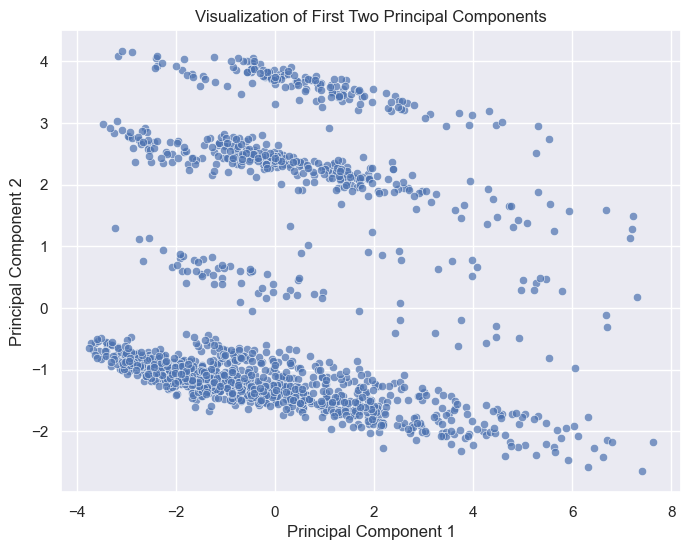

In [47]:
# Visualize the first 2 PC's which also capture most of the variance
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualization of First Two Principal Components")
plt.show()

In total 2 principal components capture approximately 20% of the variance which is very low. Let's try to increase it

In [49]:
pca = PCA(n_components=28) 
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.10800563 0.08018093 0.04812572 0.04417161 0.04114268 0.03958185
 0.0373264  0.0310295  0.02984225 0.02879753 0.02814386 0.02704947
 0.02669594 0.02635595 0.0249423  0.02452692 0.02407982 0.0236608
 0.02311703 0.0226839  0.02240808 0.02193059 0.02159506 0.02098434
 0.02063937 0.02003423 0.01931137 0.01791715]


In [50]:
pca.explained_variance_ratio_.sum()

0.9042802702782593

In order to capture 90% or more of the dataset's variation (which is the optimal) we need to keep 28 of the 48 features, so almost half of the dataset

In [52]:
# Create a DataFrame with the PCA component loadings
pca_loadings = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(pca_loadings.head()) 

          Age  BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
PC1  0.269315                         -0.009769                      0.008139   
PC2 -0.080469                          0.003320                     -0.003735   
PC3 -0.095513                          0.203376                     -0.203413   
PC4  0.234592                         -0.325861                      0.338476   
PC5  0.146025                         -0.132062                      0.122112   

     DailyRate  Department_Research & Development  Department_Sales  \
PC1  -0.005218                          -0.084176          0.087145   
PC2  -0.016466                          -0.497140          0.504905   
PC3  -0.095157                           0.022096          0.004340   
PC4  -0.005364                           0.004150         -0.021304   
PC5   0.016004                          -0.025826          0.031399   

     DistanceFromHome  Education  EducationField_Life Sciences  \
PC1          0.00682

In [53]:
# Show the top 5 most important features for each principal component
for i in range(2):  # Change the range if you want more PCs
    print(f"\nTop features for PC{i+1}:")
    print(pca_loadings.iloc[i].abs().sort_values(ascending=False).head(5))


Top features for PC1:
TotalWorkingYears       0.389711
YearsAtCompany          0.384953
JobLevel                0.381762
YearsInCurrentRole      0.334403
YearsWithCurrManager    0.327790
Name: PC1, dtype: float64

Top features for PC2:
Department_Sales                     0.504905
Department_Research & Development    0.497140
JobRole_Sales Executive              0.427257
EducationField_Marketing             0.348146
JobRole_Sales Representative         0.203038
Name: PC2, dtype: float64


PC1 seems to be highly associated with experience and seniority in the company.

- Employees with higher job levels, more total working years, and higher income contribute most to PC1.
- Employees who have been longer at the company and in their current role also influence this component.

PC2 appears to be related to departments and job roles rather than seniority or experience.

- Employees in Sales & R&D departments contribute the most to this principal component.
- Specific roles in Sales (Executives, Representatives) and Marketing are also strong contributors.

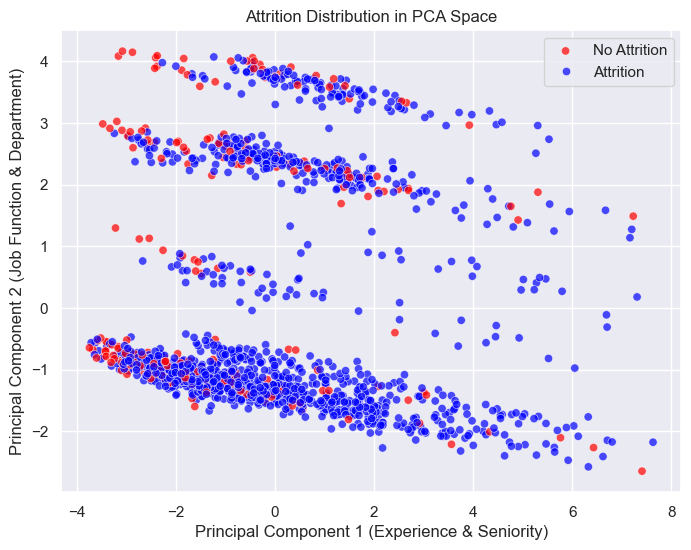

In [55]:
# let’s check if Attrition is linked to PC1 and PC2:

y = hrdata["Attrition_Yes"].values

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=["blue", "red"], alpha=0.7)
plt.xlabel("Principal Component 1 (Experience & Seniority)")
plt.ylabel("Principal Component 2 (Job Function & Department)")
plt.title("Attrition Distribution in PCA Space")
plt.legend(["No Attrition", "Attrition"])
plt.show()

## K-means

  File "C:\Users\CG121\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\CG121\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CG121\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\CG121\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


For k = 2, Silhouette Score = 0.0848
For k = 3, Silhouette Score = 0.1001
For k = 4, Silhouette Score = 0.0719
For k = 5, Silhouette Score = 0.0851
For k = 6, Silhouette Score = 0.0813
For k = 7, Silhouette Score = 0.0972
For k = 8, Silhouette Score = 0.0697
For k = 9, Silhouette Score = 0.1013
For k = 10, Silhouette Score = 0.0924
For k = 11, Silhouette Score = 0.0892
For k = 12, Silhouette Score = 0.0882
For k = 13, Silhouette Score = 0.0828
For k = 14, Silhouette Score = 0.0817


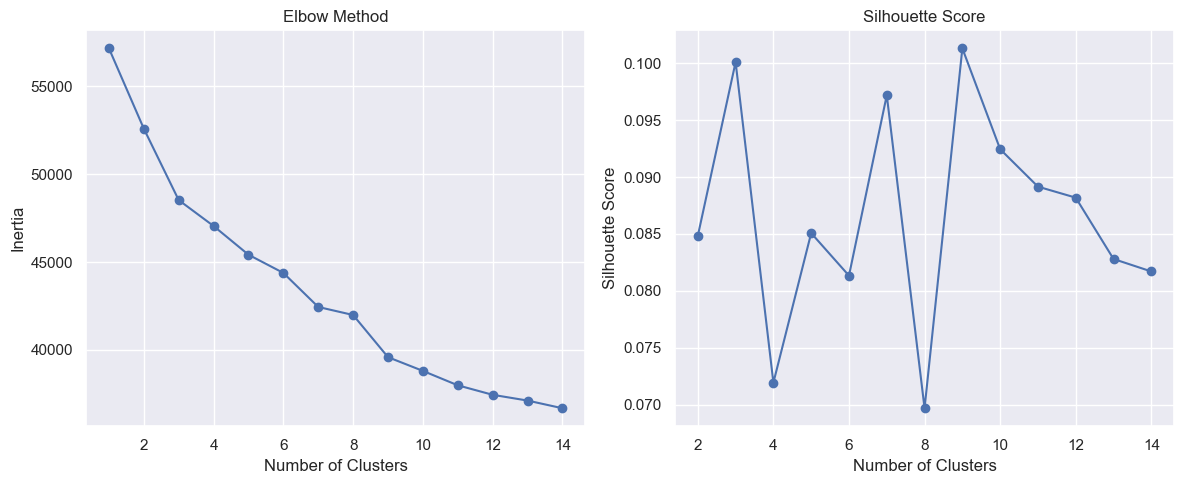

In [57]:
# Finding the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = [] 

for k in range(1, 15): # try with 20 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_) # Inertia = sum of squared distances to nearest cluster center

    # Compute silhouette score only if k > 1, because we need to have at least 1 class for this method to work
    if k > 1:
        score = silhouette_score(X_pca, kmeans.labels_)
        silhouette_scores.append(score)
        print(f"For k = {k}, Silhouette Score = {score:.4f}")

# Plotting the results side by side
plt.figure(figsize=(12, 5))
    
# Plot elbow method (inertia) to find the best K
plt.subplot(1, 2, 1)
plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")

# Plot the silhouette score for k >= 2
plt.subplot(1, 2, 2)
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")

plt.tight_layout()
plt.show()

*I checked the inertia for many different number of clusters and it just keeps decreasing. So I decided to continue with 9 by taking also into consideration the silhouette score*

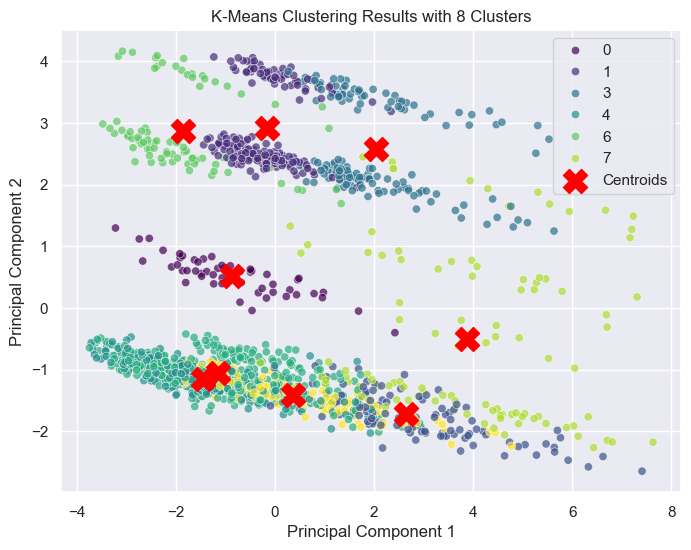

               Age   DailyRate  DistanceFromHome  Education  \
Cluster                                                       
0        35.500000  757.923077          8.173077   2.884615   
1        35.871508  853.620112         10.581006   2.921788   
2        44.438596  821.263158          8.631579   3.122807   
3        38.129252  739.360544          8.537415   3.129252   
4        34.258503  801.799320          8.911565   2.921769   
5        35.036827  815.365439          9.671388   2.815864   
6        30.361446  811.349398          8.662651   2.530120   
7        46.951923  771.009615          8.173077   3.009615   
8        38.173611  792.041667          9.388889   2.895833   

         EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Cluster                                                                  
0                       2.596154   64.173077        2.711538  1.480769   
1                       2.642458   67.027933        2.681564  2.167598   
2         

In [59]:
# Train K-Means with the optimal number of clusters which in our case was 8 (the point in which the line flattens for a moment)
kmeans = KMeans(n_clusters=9, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Adding cluster labels to the dataframe for further analysis
hrdata['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label="Centroids")
plt.title("K-Means Clustering Results with 8 Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Analyzing cluster characteristics
cluster_means = hrdata.groupby('Cluster').mean()
print(cluster_means)

It seems that some clusters are overlapping each other and they are assigned into different groups. This might be a good sign that we may need to decrease the number of clusters

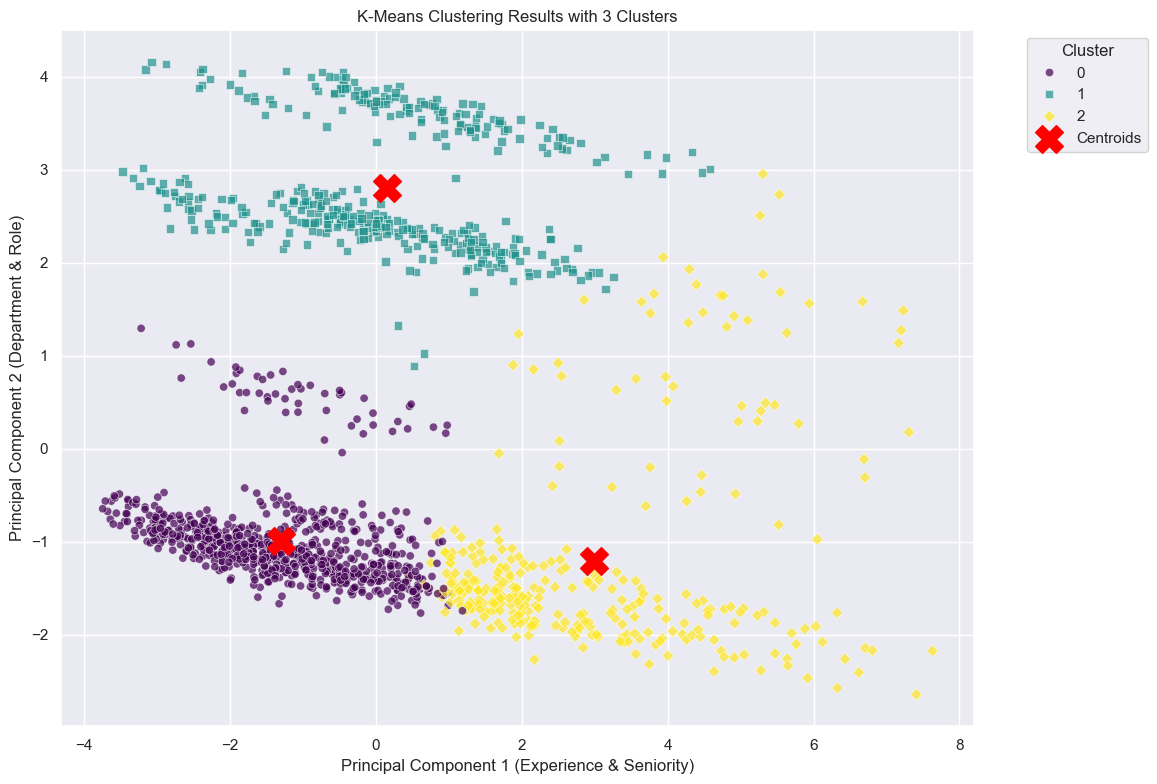

               Age   DailyRate  DistanceFromHome  Education  \
Cluster                                                       
0        34.606061  797.007905          9.094862   2.849802   
1        35.244389  797.361596          9.508728   2.915212   
2        44.770968  822.525806          9.022581   3.064516   

         EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Cluster                                                                  
0                       2.714097   66.123847        2.747036  1.466403   
1                       2.668329   65.361596        2.698254  2.062344   
2                       2.809677   66.006452        2.729032  3.529032   

         JobSatisfaction   MonthlyRate  ...  JobRole_Laboratory Technician  \
Cluster                                 ...                                  
0               2.731225  13992.645586  ...                       0.324111   
1               2.780549  14562.346633  ...                       0.000000   
2

In [61]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Adding cluster labels to the dataframe for further analysis
hrdata['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', style=clusters, markers=['o', 's', 'D', '^'], alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=400, c='red', marker='X', label="Centroids")
plt.title("K-Means Clustering Results with 3 Clusters")
plt.xlabel("Principal Component 1 (Experience & Seniority)")
plt.ylabel("Principal Component 2 (Department & Role)")
plt.tight_layout()  # Adjust layout before saving
#plt.savefig('K-means clustering.png')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Analyzing cluster characteristics
cluster_means = hrdata.groupby('Cluster').mean()
print(cluster_means)

After some tests we conclude that the optimal number of clusters is 3. This can be derived from the fact that data are harmonically differentiate into different clusters without many overlaps

- PC1 (Experience & Seniority): Clusters with centroids higher on the PC1 axis indicate groups with more experienced and possibly higher-ranking employees. Conversely, clusters lower on the PC1 axis might consist of newer, less experienced staff.
- PC2 (Departmental & Role Differences): Clusters higher on the PC2 axis may represent employees from specific departments like Sales or R&D, or those in active roles like Sales Executives. Clusters lower on the PC2 might include employees from more administrative or operational roles, or different departments.


- Low PC1, Low PC2 (Cluster 1): Younger employees in roles with relatively lower job levels and incomes. They might be newer or early-career employees.
- Low PC1, High PC2 (Cluster 2): This cluster is dominated by sales staff (Executives and Representatives). They also appear to be on the younger side, possibly mid-career sales professionals.
- High PC1, Low PC2 (Cluster 3): Senior employees in perhaps more technical or administrative roles that are not directly related to Sales or R&D. Their higher average education (3.06) aligns with senior roles. Interestingly, their job satisfaction (2.66) is slightly lower than that of the other clusters despite their higher position and so their higher income.

# 3) Predictive Models

## Random Forest

Now we will try to develop a model which will be able to predict future employee attrition from the company

We will first run the GridSearchCV to optimise the hyperparameters

In [68]:
from sklearn.model_selection import GridSearchCV

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]  # Added min_samples_leaf for more granular tuning
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)  # Directly fitting on the entire feature set

# Print the best parameters and the best cross-validation accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.8561828084300259


In [69]:
# PCA with 10-fold CV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score

#exclude_cols = ['Cluster', 'Attrition_Yes']  # We exclude the target and the one categorical variable from the training set
feature_names = hrdata.drop(['Cluster', 'Attrition_Yes'], axis=1).columns.tolist()
X = hrdata[feature_names].values
y = hrdata['Attrition_Yes'].values

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf.predict(X_test)

# Evaluating the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

print("")
# 10-fold Cross-validation
cv_scores = cross_val_score(rf, X, y, cv=10)
print("10-Fold CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       380
           1       0.78      0.11      0.20        61

    accuracy                           0.87       441
   macro avg       0.83      0.55      0.57       441
weighted avg       0.86      0.87      0.83       441

Accuracy: 0.873015873015873
Precision: 0.7777777777777778
Recall: 0.11475409836065574
F1 score: 0.2

10-Fold CV Accuracy Scores: [0.84353741 0.84353741 0.8707483  0.84353741 0.8707483  0.84353741
 0.84353741 0.8707483  0.85714286 0.85714286]
Mean CV Accuracy: 0.8544217687074831


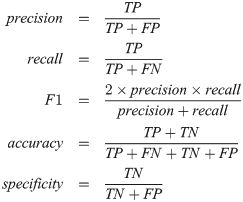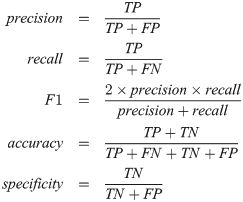

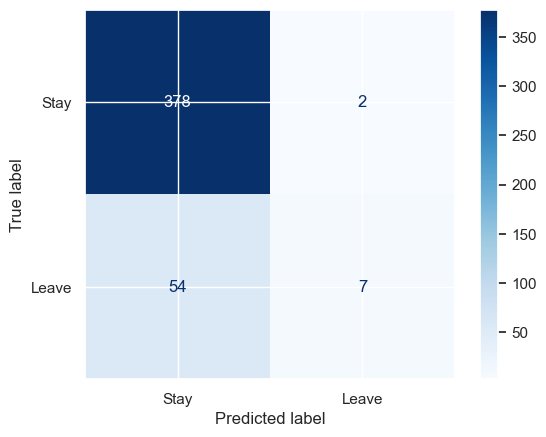

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stay', 'Leave'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Although our model is very accurate at precicting who will stay at the compnay, it perofrms very poorly when it predicts who is going to quit and it misses on false negatives. For this reason we will try another predictive model which is XGBoost

Feature Importances:
 Age                                  0.067901
TotalWorkingYears                    0.062904
OverTime_Yes                         0.057683
DailyRate                            0.053008
MonthlyRate                          0.047979
HourlyRate                           0.046299
YearsAtCompany                       0.045373
DistanceFromHome                     0.044729
NumCompaniesWorked                   0.040675
StockOptionLevel                     0.037414
YearsInCurrentRole                   0.035856
YearsWithCurrManager                 0.035771
PercentSalaryHike                    0.032000
JobLevel                             0.030213
EnvironmentSatisfaction              0.027219
TrainingTimesLastYear                0.027092
RelationshipSatisfaction             0.025338
JobSatisfaction                      0.024646
YearsSinceLastPromotion              0.024182
JobInvolvement                       0.023229
MaritalStatus_Single                 0.022796
WorkLifeBala

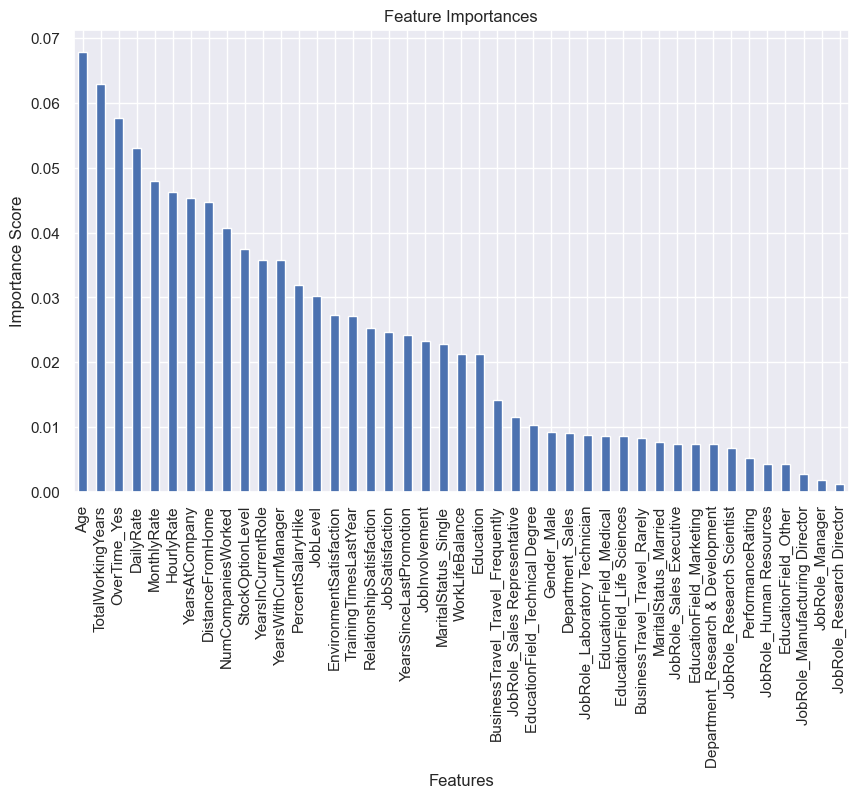

In [73]:
# Find the feature importances

# Get feature importances from the trained model
importances = rf.feature_importances_

# Create a Series with feature names as the index
feat_importances = pd.Series(importances, index=feature_names)

# Sort them for easier interpretation
feat_importances = feat_importances.sort_values(ascending=False)

print("Feature Importances:\n", feat_importances)

plt.figure(figsize=(10, 6))
feat_importances.plot(kind='bar')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

From the plot and the sorted list we can observe that "Age", "TotalWorkingYears" and "Overtime_Yes" are the most significant features for this algorithm

## XGBoost

At this part I will also test the effectiveness of the xgboost algorithm on this dataset. The same steps as those followed in random forest will also be followed in this case.

In [77]:
# Initialize the XGBClassifier. 
# 'use_label_encoder=False' and 'eval_metric' are set to avoid warnings.
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],   # Similar in spirit to min_samples_leaf
    'gamma': [0, 0.1, 0.2]            # Regularization parameter for controlling overfitting
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV on the training set
grid_search.fit(X_train, y_train)

# Print the best parameters and the best cross-validation accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found: {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100}
Best cross-validation accuracy: 0.8668624200805114


In [78]:
feature_names = hrdata.drop(['Cluster', 'Attrition_Yes'], axis=1).columns.tolist()
X = hrdata[feature_names].values
y = hrdata['Attrition_Yes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=100, random_state=42)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# Evaluating the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

print("")

# 10-fold Cross-validation
cv_scores = cross_val_score(xgb, X, y, cv=10)
print("10-Fold CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.67      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.79      0.67      0.70       294
weighted avg       0.88      0.89      0.88       294

Accuracy: 0.891156462585034
Precision: 0.6666666666666666
Recall: 0.358974358974359
F1 score: 0.4666666666666667

10-Fold CV Accuracy Scores: [0.85034014 0.84353741 0.89795918 0.82312925 0.85034014 0.85034014
 0.86394558 0.8707483  0.89115646 0.89795918]
Mean CV Accuracy: 0.8639455782312924


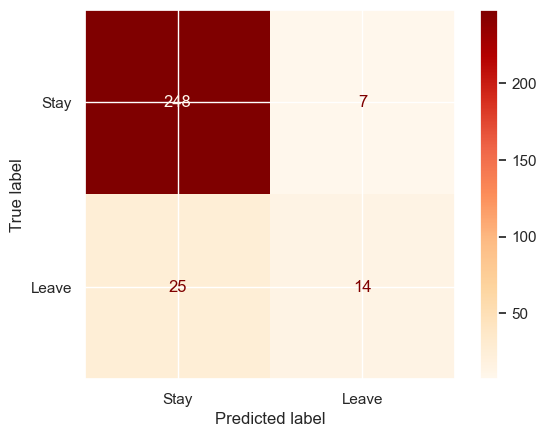

In [79]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stay', 'Leave'])
disp.plot(cmap=plt.cm.OrRd)
plt.show()

XGBoost algorithm seems to work better in our dataset. Overall the model it's more accurate, there might be a small decrease in the precision for predicting attrition but the recall metric has significantly increased for this case.

Feature Importances:
 JobRole_Sales Executive              0.086030
OverTime_Yes                         0.078477
JobLevel                             0.061262
StockOptionLevel                     0.049146
JobRole_Research Scientist           0.045671
TotalWorkingYears                    0.034364
Department_Sales                     0.033296
YearsAtCompany                       0.030696
MaritalStatus_Single                 0.028740
YearsSinceLastPromotion              0.025915
JobRole_Sales Representative         0.025749
EnvironmentSatisfaction              0.025108
Age                                  0.025097
JobInvolvement                       0.024646
NumCompaniesWorked                   0.024437
YearsWithCurrManager                 0.023692
YearsInCurrentRole                   0.023485
BusinessTravel_Travel_Frequently     0.022299
MaritalStatus_Married                0.021684
Department_Research & Development    0.021003
JobSatisfaction                      0.020999
EducationFie

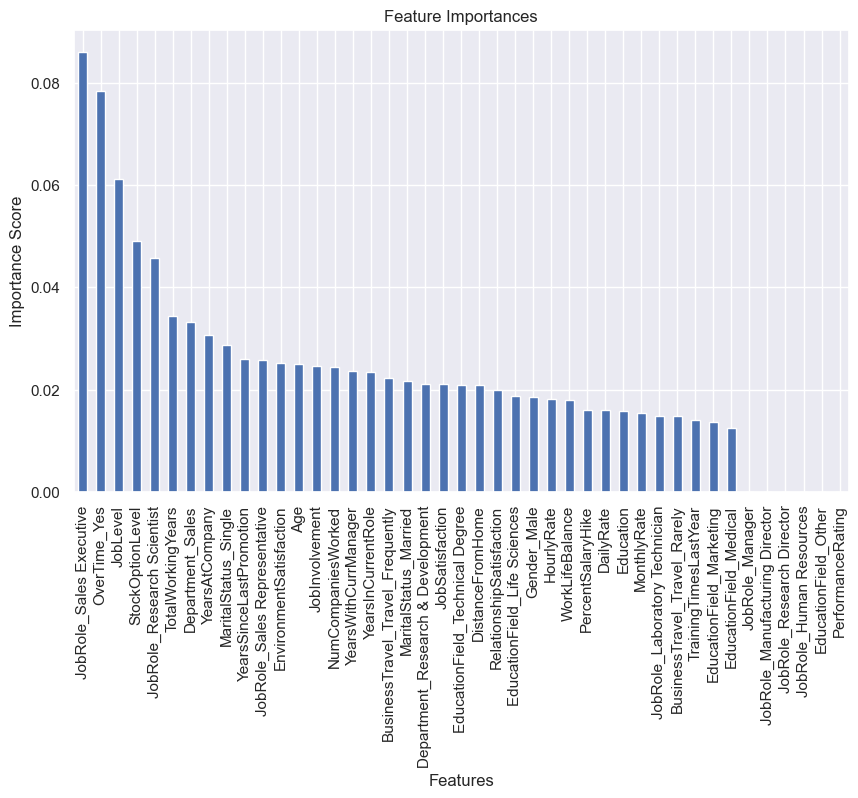

In [81]:
# Feature importances

# Get feature importances from the trained model
importances = xgb.feature_importances_

# Create a Series with feature names as the index
feat_importances = pd.Series(importances, index=feature_names)

# Sort them for easier interpretation
feat_importances = feat_importances.sort_values(ascending=False)

print("Feature Importances:\n", feat_importances)

plt.figure(figsize=(10, 6))
feat_importances.plot(kind='bar')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

"JobRole_Sales Executive", "OverTime_Yes" and "JobLevel" are the most importan features for xgboost algorithm. We can observe that in both models the overtime factor plays an important role and it should be considered

# 4) SHAP (SHapley Additive exPlanations)

With SHAP we can understand which factors drive the model’s decisions

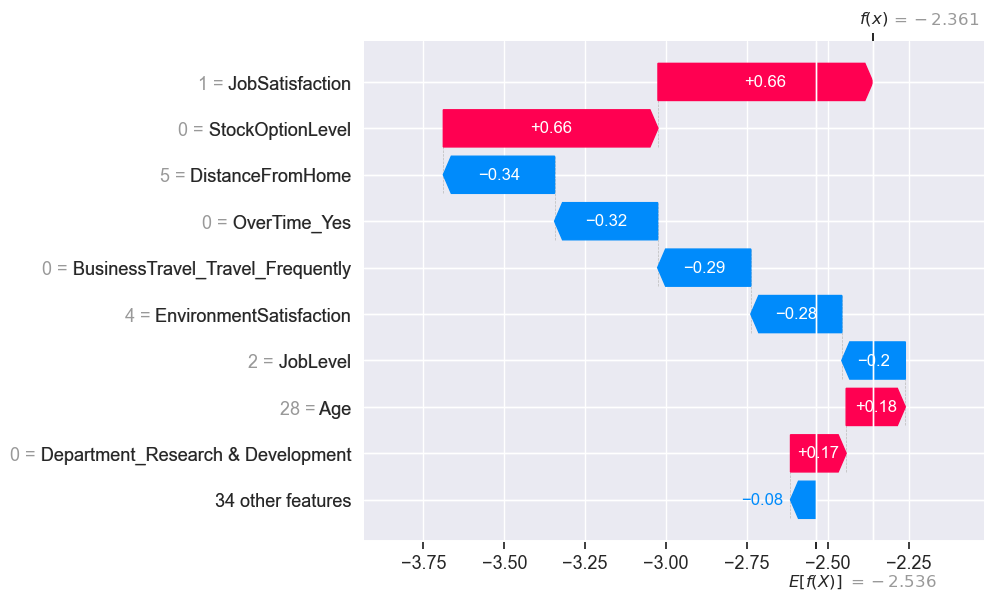

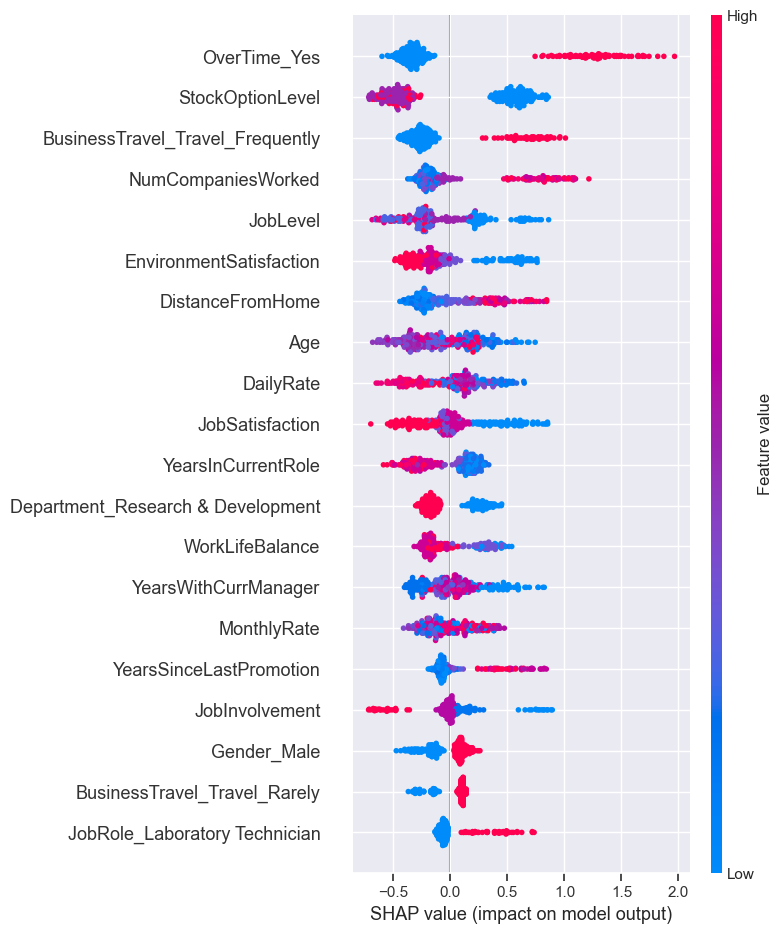

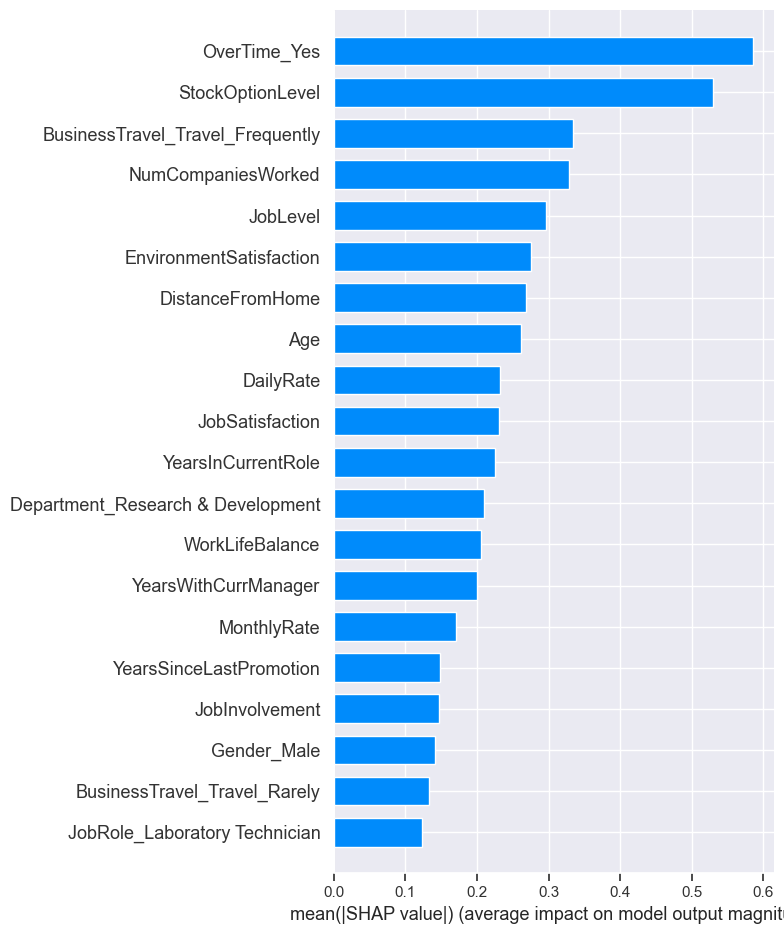

In [88]:
import shap

# Convert arrays to DataFrames in order to print the variable names in the plot
X_train_hr = pd.DataFrame(X_train, columns=feature_names)
X_test_hr = pd.DataFrame(X_test, columns=feature_names)

# Create the explainer with the DataFrame so SHAP automatically picks up the feature names
explainer = shap.Explainer(xgb, X_train_hr) 
shap_values = explainer(X_test_hr)

shap.plots.waterfall(shap_values[0])
shap.summary_plot(shap_values, X_test_hr)
shap.summary_plot(shap_values, X_test_hr, plot_type="bar")

From the SHAP graph we can obsereve that the three most important features that contributed the most on the model and increase the probability of someone quiting his job are: "Overtime_Yes", "NumCompaniesWorked" and "BusinessTravel_Travel_Frequently". This clearly indicates a tendency for employees who work overtime, travel frequently, and have changed many jobs throughout their careers to leave.